In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8) # set figure size

np.random.seed(100)

## Discrete random numbers

### Binomial random variables

Suppose researchers want to simulate 10 coin toss, so generates 10 Bernoulli Random variables with p=0.5

In [4]:
nRandom = 10
n = 1
p = 0.5
np.random.binomial(n, p, size=nRandom)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

Alternatively, the number of head can be generated using Binomial with n=10.

In [10]:
nRandom = 1
n = 10
p = 0.5
np.random.binomial(n, p, size=nRandom)

array([7])

Suppose that researchers are interested in calculating a probability of 1 head.

In [4]:
n = 10
p = 0.5
x = 1

prob1 = math.comb(n, x)* (p ** x) *((1-p)**(n-x))
print("From calculation:",  prob1, "\n")

# now use pdf function 
prob2 = stats.binom.pmf(x, n, p)
print("From pdf function:", prob2, "\n")

From calculation: 0.009765625 

From pdf function: 0.009765625000000002 



Now calculating P(x <= 3)

In [6]:
n = 10
p = 0.5
x = 3

CDF1 = 0
for i in range(x+1):
    CDF1 = CDF1 + stats.binom.pmf(i, n, p)

# CDF function
CDF2 = stats.binom.cdf(x, n, p)

print("From calculation:",  CDF1, "\n")
print("From cdf function:", CDF2, "\n")


From calculation: 0.17187500000000014 

From cdf function: 0.17187499999999994 



Suppose researchers are interested in generating 10 Binomial Random variables, and all have different n and p. And also calculate P(x=3) and P(x<=3)

In [7]:
nRandom = 10
n = np.arange(11, 11+nRandom)
p = np.linspace(0.2, 0.8, num=nRandom)

rv = np.random.binomial(n, p)
prob = stats.binom.pmf(3, n, p)
CDF = stats.binom.cdf(3, n, p)

print("n:", n, "\n")
print("p:", p, "\n")
print("rv:", rv, "\n")
print("prob:", prob, "\n")
print("CDF:", CDF, "\n")


n: [11 12 13 14 15 16 17 18 19 20] 

p: [0.2        0.26666667 0.33333333 0.4        0.46666667 0.53333333
 0.6        0.66666667 0.73333333 0.8       ] 

rv: [ 1  2  2  4 11  7 12 10 15 16] 

prob: [2.21459251e-01 2.55883164e-01 1.83691761e-01 8.45172022e-02
 2.44915615e-02 4.22933770e-03 3.94277998e-04 1.68499090e-05
 2.49877856e-07 7.65041050e-10] 

CDF: [8.38860800e-01 5.96727535e-01 3.22424001e-01 1.24308783e-01
 3.20858052e-02 5.11991479e-03 4.51401063e-04 1.85250915e-05
 2.66573075e-07 7.97767107e-10] 




### Poisson random variables
Now researchers are interested in Poisson distribution. Following code generates 1000 poisson random variables with lambda=2


In [8]:
nRandom = 1000
Lambda = 2

out = np.random.poisson(Lambda, nRandom)
print('mean:', np.mean(out),"\n")
print('var:', np.var(out), "\n")

mean: 1.947 

var: 1.9501909999999998 



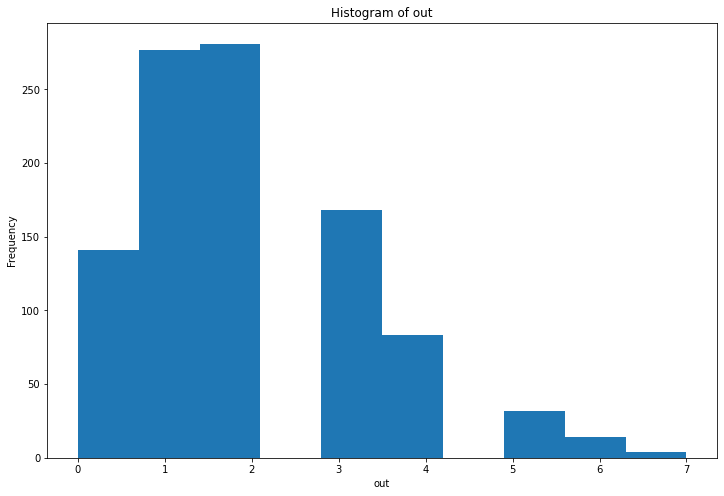

In [9]:
plt.hist(out)
plt.xlabel('out')
plt.ylabel('Frequency')
plt.title('Histogram of out');

## Continuous random variables
### Normal random variables
Following code generates 10000 Normal random variables with (mean=173, sd=2), calculates mean and var, and draw histogram.


mean: 173.02543385902533 

var: 4.023488085847857 



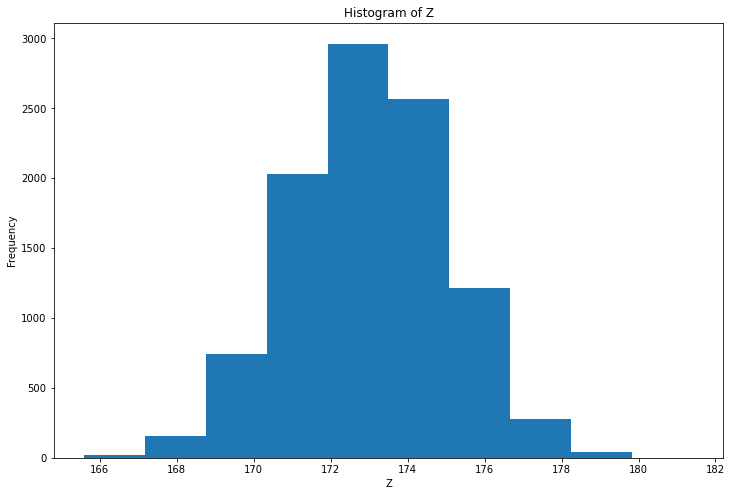

In [26]:
nRandom = 10000
Z = np.random.normal(173, 2, size=nRandom)

print('mean:', np.mean(Z),"\n")
print('var:', np.var(Z), "\n")

plt.hist(Z)
plt.xlabel('Z')
plt.ylabel('Frequency')
plt.title('Histogram of Z');


### Chi-square
Following code generate 10000 chi-squared random variables two different ways and compare them


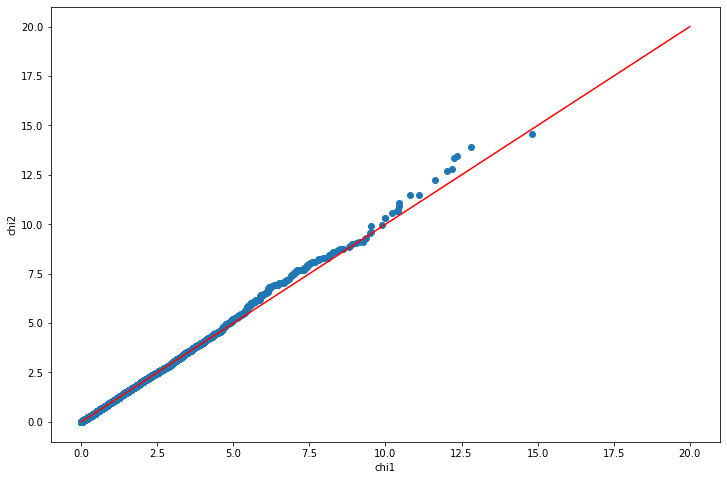

In [163]:
nRandom = 10000
Z = np.random.normal(loc=0, scale=1, size=nRandom)
chi1 = Z**2

# compare them with random numbers from chi
chi2 = np.random.chisquare(df=1, size=nRandom)

# Use QQ plot to compare
plt.scatter(np.sort(chi1), np.sort(chi2))
plt.plot([0,20],[0,20], c='red')
plt.xlabel('chi1')
plt.ylabel('chi2');

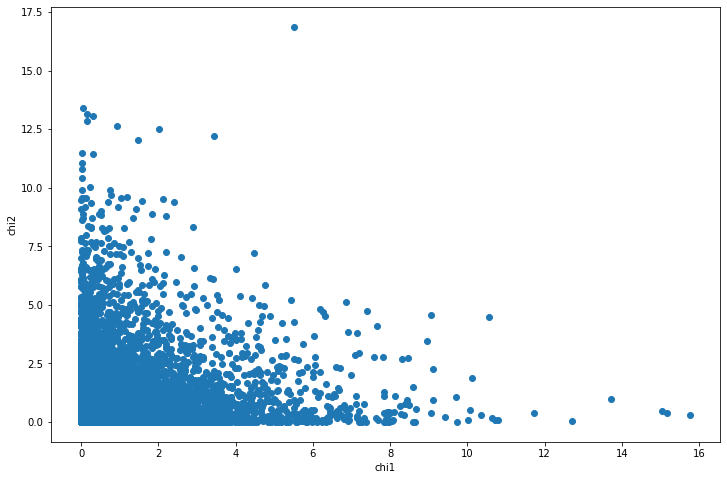

In [157]:
# How about scatter plot?
plt.scatter(chi1, chi2)
plt.xlabel('chi1')
plt.ylabel('chi2');

## Simulation studies to predict number of new COVID infection
Researchers are interested in predicting the number of cases of COVID and the effect of the intervention measures and policies. To do this, we consider a following simulation scheme 

* 5 days as one-time unit. So 20 time units for 100 days 
* Initially there are 10 cases
* Each case has x close contacts in one-time unit, where x follows a Poisson distribution with lambda=10
* For each close contact, there is p=0.2 probability of the infection
* For simplicity, we consider that newly infected individual can only infect individuals in the next time unit (so only one time unit). It is similar after one-time unit, infected individuals are either detected/cured/died. 
* Do not consider a situation that infected individual has a close contact with already infected individual.

The following code run for 10 time units (50 days) to get trajectory of new cases.



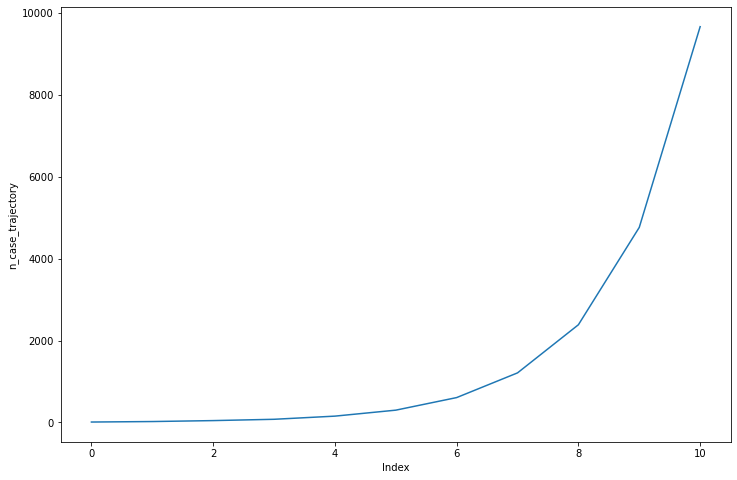

In [27]:
n_current_case = 10
n_case_trajectory = np.zeros(11)
n_case_trajectory[0] = 10

for i in range(10):
    n_contact = np.random.poisson(10, n_current_case)
    n_new_case = np.random.binomial(n_contact, 0.2)
    n_current_case = np.sum(n_new_case)
    n_case_trajectory[i+1] = n_current_case
    
plt.plot(n_case_trajectory)
plt.xlabel('Index')
plt.ylabel('n_case_trajectory');

At day 50, people realize the severity of the problem and start to wash hand and wear a mask, which change p=0.14. Also government impose social distancing which changes lambda=3. Get the trajectory for the next 50 days


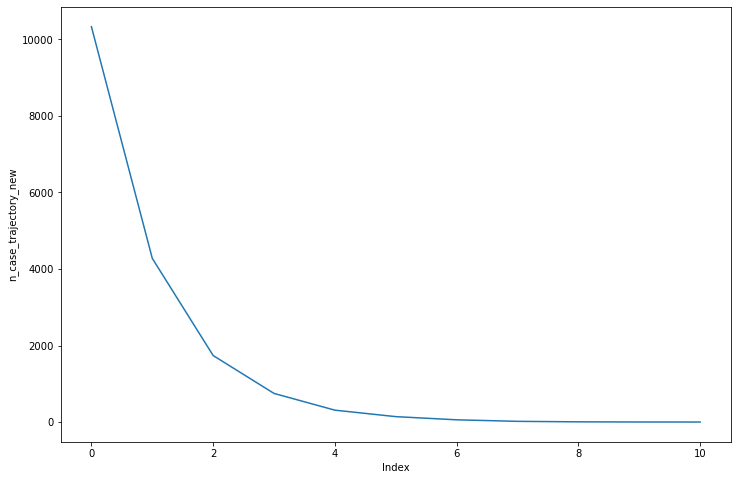

In [167]:
n_case_trajectory_new = np.zeros(11)
n_case_trajectory_new[0] = n_current_case

for i in range(10):
    n_contact = np.random.poisson(3, n_current_case)
    n_new_case = np.random.binomial(n_contact, 0.14)
    n_current_case = np.sum(n_new_case)
    n_case_trajectory_new[i+1] = n_current_case
    
plt.plot(n_case_trajectory_new)
plt.xlabel('Index')
plt.ylabel('n_case_trajectory_new');